In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/creditcardfraud/creditcard.csv


Importing libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [3]:
df=pd.read_csv('/kaggle/input/creditcardfraud/creditcard.csv')

In [4]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


Data Preproccessing

In [5]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [7]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [8]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [9]:
df['Class']

0         0
1         0
2         0
3         0
4         0
         ..
284802    0
284803    0
284804    0
284805    0
284806    0
Name: Class, Length: 284807, dtype: int64

In [10]:
X=df.drop(columns='Class',axis=1)
Y=df['Class']

Plots and Visualizations

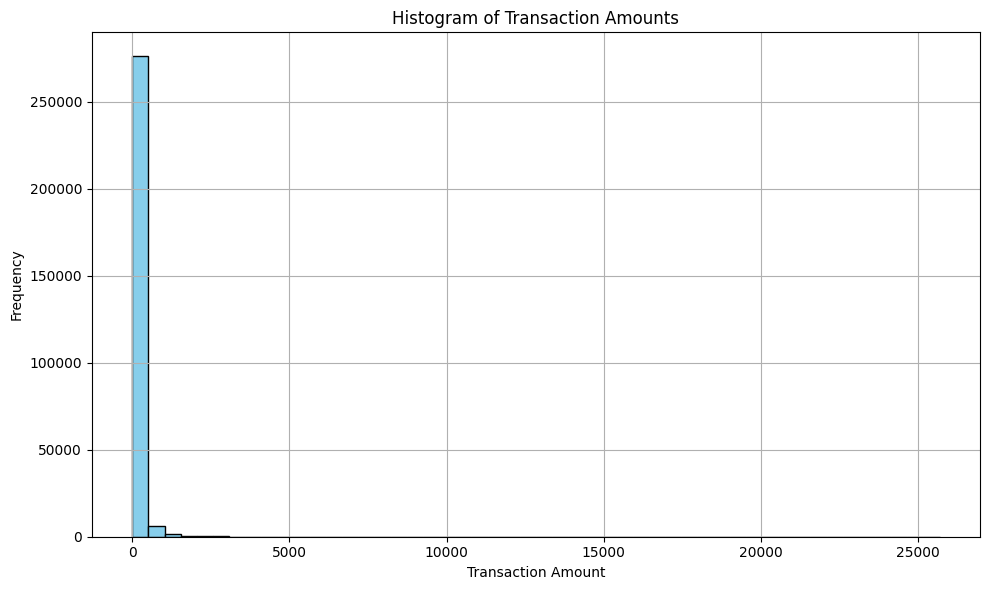

In [60]:
import matplotlib.pyplot as plt

# Example data (replace with your actual DataFrame)
amounts = df['Amount']
plt.figure(figsize=(10, 6))
plt.hist(amounts, bins=50, color='skyblue', edgecolor='black')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.title('Histogram of Transaction Amounts')
plt.grid(True)
plt.tight_layout()
plt.show()


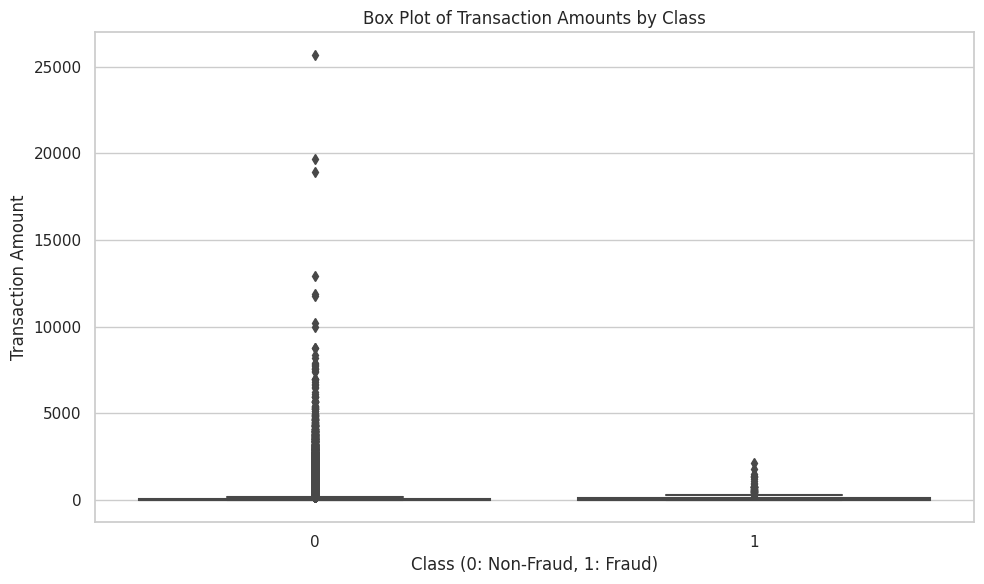

In [61]:
import seaborn as sns
import matplotlib.pyplot as plt

# Example data (replace with your actual DataFrame)
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.boxplot(x='Class', y='Amount', data=df, palette='Set1')
plt.xlabel('Class (0: Non-Fraud, 1: Fraud)')
plt.ylabel('Transaction Amount')
plt.title('Box Plot of Transaction Amounts by Class')
plt.tight_layout()
plt.show()


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Example data (replace with your actual DataFrame)
corr = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix Heatmap')
plt.tight_layout()
plt.show()


In [11]:
# from imblearn.over_sampling import SMOTE
# from sklearn.model_selection import train_test_split

# # Assuming you have your features X and target y ready

# # Splitting the data into train and test sets
# X_train, X_test1, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# # Applying SMOTE to the training set only
# smote = SMOTE(random_state=42)
# X_train_resampled, y_train_resampled = smote.fit_resample(X_train, Y_train)

# # Now X_train_resampled and y_train_resampled contain the resampled data
# # You can now train your model on this resampled data


In [12]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25,random_state=0)

In [13]:
X

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00


In [14]:
Y

0         0
1         0
2         0
3         0
4         0
         ..
284802    0
284803    0
284804    0
284805    0
284806    0
Name: Class, Length: 284807, dtype: int64

In [15]:
X_train.shape

(213605, 30)

In [16]:
Y_train.shape

(213605,)

Logistic Regression

In [17]:
model_lr=LogisticRegression()

In [18]:
model_lr.fit(X_train,Y_train)

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [19]:
y_pred_lr = model_lr.predict(X_test)
acc_lr = accuracy_score(Y_test, y_pred_lr)

In [20]:
from sklearn.metrics import precision_score, recall_score, f1_score

In [21]:
precision_lr = precision_score(Y_test, y_pred_lr)


# Calculate recall
recall_lr = recall_score(Y_test, y_pred_lr)

# Calculate F1-score
f1_lr = f1_score(Y_test, y_pred_lr)

In [22]:
print("Accuracy",acc_lr)
print("Precison",precision_lr)
print("Recall",recall_lr)
print("F1Score",f1_lr)

Accuracy 0.9989887924496503
Precison 0.7181818181818181
Recall 0.6583333333333333
F1Score 0.6869565217391305


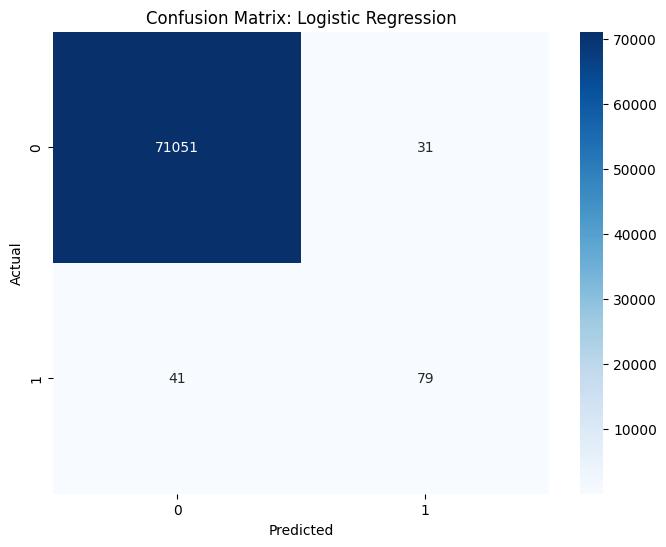

In [23]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

cm_lr = confusion_matrix(Y_test, y_pred_lr)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_lr, annot=True, cmap='Blues', fmt='d', xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix: Logistic Regression')
plt.show()

In [24]:
df.shape

(284807, 31)

KNN

In [25]:
from sklearn.neighbors import KNeighborsClassifier

In [26]:
k=5
model_knn=KNeighborsClassifier(n_neighbors=k)

In [27]:
model_knn.fit(X_train,Y_train)

KNeighborsClassifier()

In [28]:
y_pred_knn = model_knn.predict(X_test)

In [29]:


acc_knn = accuracy_score(Y_test, y_pred_lr)
precision_knn = precision_score(Y_test, y_pred_lr)
recall_knn = recall_score(Y_test, y_pred_lr)
f1_knn = f1_score(Y_test, y_pred_lr)


In [30]:
print("Accuracy",acc_knn)
print("Precison",precision_knn)
print("Recall",recall_knn)
print("F1Score",f1_knn)

Accuracy 0.9989887924496503
Precison 0.7181818181818181
Recall 0.6583333333333333
F1Score 0.6869565217391305


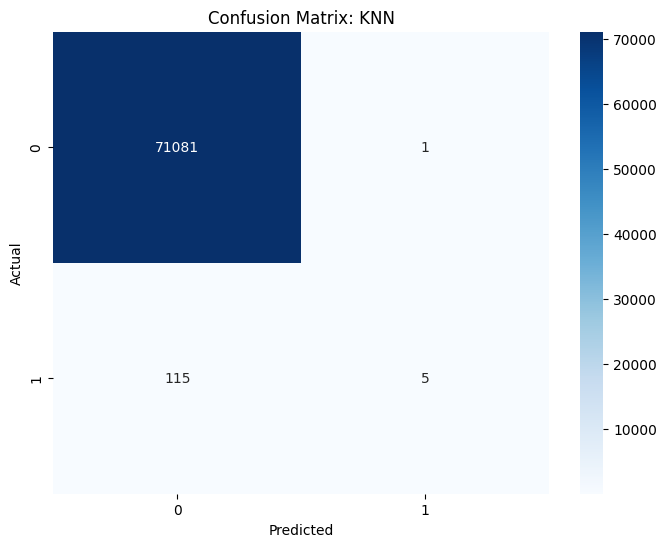

In [31]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

cm_lr = confusion_matrix(Y_test, y_pred_knn)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_lr, annot=True, cmap='Blues', fmt='d', xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix: KNN')
plt.show()

Random Forest

In [32]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [33]:
model_rf = RandomForestClassifier(n_estimators=100, random_state=42)

In [34]:
model_rf.fit(X_train, Y_train)

RandomForestClassifier(random_state=42)

In [35]:

y_pred_rf = model_rf.predict(X_test)
acc_rf = accuracy_score(Y_test, y_pred_rf)

In [36]:

precision_rf = precision_score(Y_test, y_pred_rf)
recall_rf = recall_score(Y_test, y_pred_rf)
f1_rf = f1_score(Y_test, y_pred_rf)


In [37]:
print("Accuracy",acc_rf)
print("Precison",precision_rf)
print("Recall",recall_rf)
print("F1Score",f1_rf)

Accuracy 0.9995084407741356
Precison 0.9292929292929293
Recall 0.7666666666666667
F1Score 0.8401826484018264


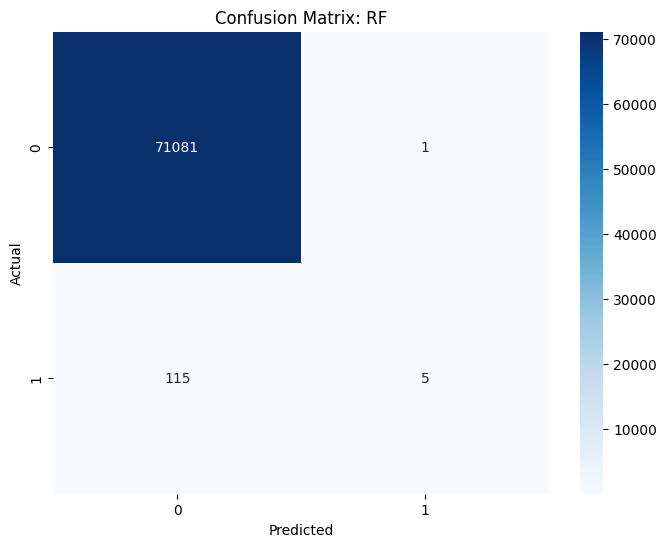

In [38]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

cm_lr = confusion_matrix(Y_test, y_pred_knn)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_lr, annot=True, cmap='Blues', fmt='d', xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix: RF')
plt.show()

SVM

In [39]:
# from sklearn.svm import SVC

In [40]:
# svm_model = SVC(kernel='linear', random_state=42)

In [41]:
# svm_model.fit(X_train, Y_train)

In [42]:
# y_pred_svm =svm_model.predict(X_test)
# acc_svm = accuracy_score(Y_test, y_pred_svm)

In [43]:

# precision_svm= precision_score(Y_test, y_pred_)svm
# recall_svm = recall_score(Y_test, y_pred_svm)
# f1_svm = f1_score(Y_test, y_pred_svm)


In [44]:
# print("Accuracy",acc_svm)
# print("Precison",precision_svm)
# print("Recall",recall_svm)
# print("F1Score",f1_svm)

In [45]:
# from sklearn.metrics import confusion_matrix
# import matplotlib.pyplot as plt
# import seaborn as sns

# cm_lr = confusion_matrix(Y_test, y_pred_knn)

# # Plot confusion matrix
# plt.figure(figsize=(8, 6))
# sns.heatmap(cm_lr, annot=True, cmap='Blues', fmt='d', xticklabels=['0', '1'], yticklabels=['0', '1'])
# plt.xlabel('Predicted')
# plt.ylabel('Actual')
# plt.title('Confusion Matrix: RF')
# plt.show()

Naive Bayes

In [46]:
from sklearn.naive_bayes import GaussianNB

In [47]:
nb_model = GaussianNB()
nb_model.fit(X_train, Y_train)
y_pred_nb =nb_model.predict(X_test)
acc_nb = accuracy_score(Y_test, y_pred_nb)

In [48]:
precision_nb= precision_score(Y_test, y_pred_nb)
recall_nb = recall_score(Y_test, y_pred_nb)
f1_nb = f1_score(Y_test, y_pred_nb)

In [49]:
print("Accuracy",acc_nb)
print("Precison",precision_nb)
print("Recall",recall_nb)
print("F1Score",f1_nb)

Accuracy 0.9930760371899666
Precison 0.14476190476190476
Recall 0.6333333333333333
F1Score 0.23565891472868214


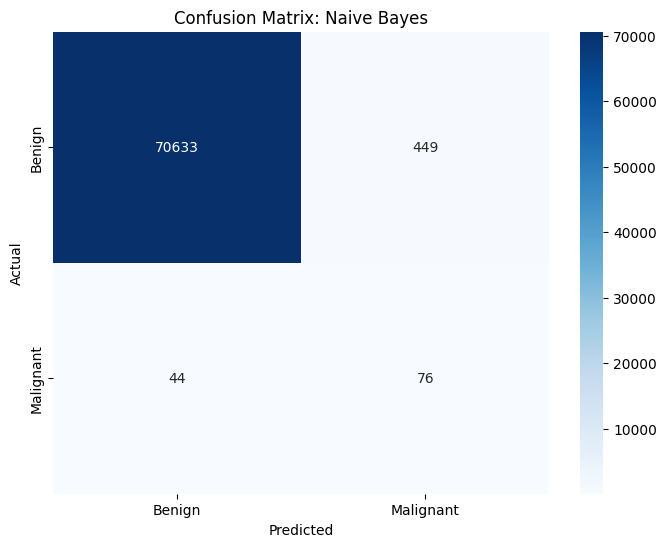

In [50]:
cm_nb = confusion_matrix(Y_test, y_pred_nb)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_nb, annot=True, cmap='Blues', fmt='d', xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix: Naive Bayes')
plt.show()

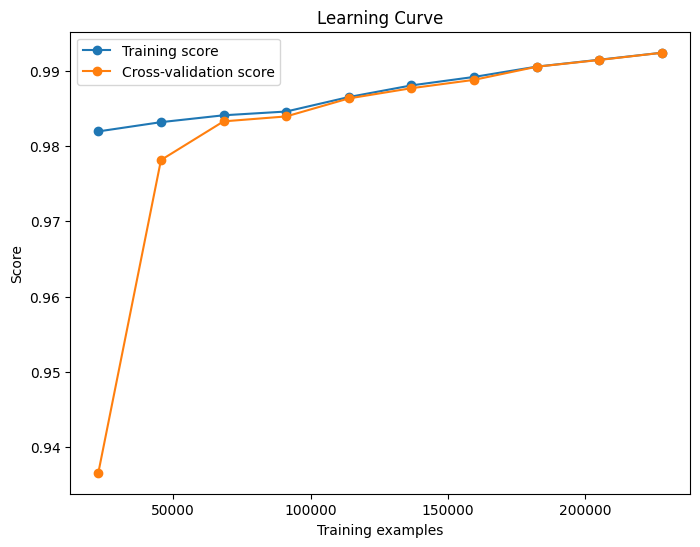

In [53]:
from sklearn.model_selection import learning_curve

# Example: Plot learning curve (for a 'model')
train_sizes, train_scores, test_scores = learning_curve(nb_model, X, Y, cv=5, train_sizes=np.linspace(0.1, 1.0, 10))

plt.figure(figsize=(8, 6))
plt.plot(train_sizes, np.mean(train_scores, axis=1), 'o-', label='Training score')
plt.plot(train_sizes, np.mean(test_scores, axis=1), 'o-', label='Cross-validation score')
plt.xlabel('Training examples')
plt.ylabel('Score')
plt.title('Learning Curve')
plt.legend(loc='best')
plt.show()

Conclusion

In [56]:
from tabulate import tabulate

In [57]:
data = [
    ['Logistic Regression', 0.998],
    ['KNN',0.998],
    ['Random Forest', 0.9995],
    ['Naive Bayes', 0.993]
]

# Create a table using tabulate
table = tabulate(data, headers=['Model', 'Accuracy'], tablefmt='grid')

# Print the table
print(table)

+---------------------+------------+
| Model               |   Accuracy |
+=====================+============+
| Logistic Regression |     0.998  |
+---------------------+------------+
| KNN                 |     0.998  |
+---------------------+------------+
| Random Forest       |     0.9995 |
+---------------------+------------+
| Naive Bayes         |     0.993  |
+---------------------+------------+
